The original code from https://github.com/DataResponsibly/FairRank was modified where necessary to run in python 3

In [1]:
from measures import *
import numpy as np
import random
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
KL_DIVERGENCE = "rKL"
ND_DIFFERENCE = "rND"
RD_DIFFERENCE = "rRD"

metrics = [KL_DIVERGENCE, ND_DIFFERENCE, RD_DIFFERENCE]

In [3]:
N = 100 
pro_N = 20
cut_point = 10

In [4]:
max_rKL = getNormalizer(N,pro_N,KL_DIVERGENCE)  
max_rND = getNormalizer(N,pro_N,ND_DIFFERENCE)
max_rRD = getNormalizer(N,pro_N,RD_DIFFERENCE)

print("max_rKL", max_rKL)
print("max_rND", max_rND)
print("max_rRD", max_rRD)

max_rKL 0.5283825532617152
max_rND 0.6454208917561917
max_rRD 0.41182819993092445


Notice that getNormalizer(N,pro_N,KL_DIVERGENCE) is giving random resuls affecting the normalized value of rKL at the end of tests, this seems unreliable as the range of variation is very big

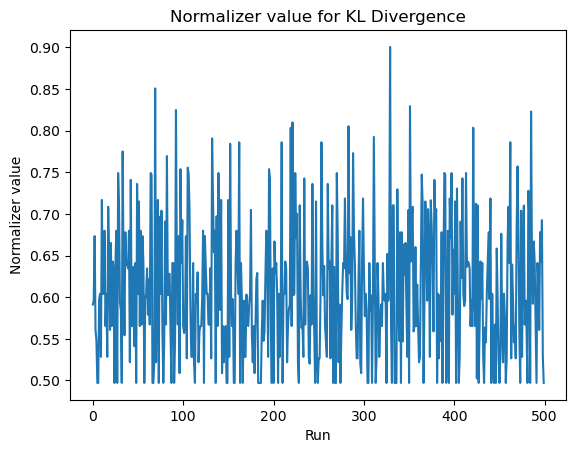

In [5]:
test_kl_normalizer = []
for i in range(500):
    test_kl_normalizer.append(getNormalizer(N, pro_N, KL_DIVERGENCE))
    
plt.title("Normalizer value for KL Divergence")
plt.xlabel("Run")
plt.ylabel("Normalizer value")
plt.plot(test_kl_normalizer)
plt.show()

When the protected group is given all the lowest ranks in the ranking, then rND gives a score of about 0.5, rRD is 1. But
rKL will return a random score based on the normalizer calculated in the previous step

In [6]:
test_ranking = [x for x in range(N)]
# protected group is given all the lowest ranks in the ranking:
pro_index= test_ranking[N-pro_N:]

fair_rKL = calculateNDFairness(test_ranking,pro_index,cut_point,KL_DIVERGENCE,1)
fair_rND = calculateNDFairness(test_ranking,pro_index,cut_point,ND_DIFFERENCE,1)
fair_rRD = calculateNDFairness(test_ranking,pro_index,cut_point,RD_DIFFERENCE,1)

nfair_rKL = calculateNDFairness(test_ranking, pro_index, cut_point, KL_DIVERGENCE, max_rKL)
nfair_rND = calculateNDFairness(test_ranking, pro_index, cut_point, ND_DIFFERENCE, max_rND)
nfair_rRD = calculateNDFairness(test_ranking, pro_index, cut_point, RD_DIFFERENCE, max_rRD)

print("rKL of test ranking is ", str(fair_rKL), "normalized rKL of test ranking is ", str(nfair_rKL))
print("rND of test ranking is ", str(fair_rND), "normalized rND of test ranking is ", str(nfair_rND))
print("rRD of test ranking is ", str(fair_rRD), "normalized rRD of test ranking is ", str(nfair_rRD))

rKL of test ranking is  0.4970910584453636 normalized rKL of test ranking is  0.940778713030571
rND of test ranking is  0.32775520565263006 normalized rND of test ranking is  0.5078162325375112
rRD of test ranking is  0.4118281999309245 normalized rRD of test ranking is  1.0000000000000002


## Fairness:
All metrics have their best (most fair) value at 0, and their worst value at 1

Test that I will try to implement in as many metrics as possible:
Initiate two lists: 
- list $\tau$ of positions in the ranking = [0, 1, 2, ..., n]
- list $p$ of length $n$ of shuffled positions in $\tau$

$\tau$ initially has all items from the non-protected group   
compute fairness for the group. It should be maximally unfair.

for $i$ in $n$:
- replace item $\tau_{p[i]}$ with an item from the protected group
- compute fairness

The fairness should gradually increase
Next we distinguish two behaviours: 
- The metric is symmetric, therefore at some level the fairness decreases
- The metric is asymmtetric and is not sensitive to the protected group becoming the majority

## One protected group member at different positions in the ranking

Notice that according to rKL and rND, placing an individual item from the protected group at the top of the ranking is worse than at the bottom of the ranking

In [7]:
cut_point = 10

test_ranking = [x for x in range(N)]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

results = { KL_DIVERGENCE : [], 
           ND_DIFFERENCE : [],
           RD_DIFFERENCE : []}

maxes = { KL_DIVERGENCE: getNormalizer(N,1,KL_DIVERGENCE),
         ND_DIFFERENCE: getNormalizer(N,1,ND_DIFFERENCE),
         RD_DIFFERENCE: getNormalizer(N,1,RD_DIFFERENCE)}

for i in range(1, N):
    for j, metric in enumerate(metrics):
        results[metric].append(calculateNDFairness(test_ranking,[i],cut_point,metric,maxes[metric]))


In [8]:
def plotResults(results_to_plot, title, savetofile, xlabel):
    fig, axes = plt.subplots(1, len(metrics), sharey=True, figsize=(12,3), constrained_layout=True)
    axes = axes.ravel()

    axes[0].set_ylabel('Fairness Score')
    fig.text(0.5, -0.05, xlabel, ha='center')

    for i, metric in enumerate(metrics):
        axes[i].plot(list(range(1, N)), results_to_plot[metric])
        axes[i].set_title(metric)
        axes[i].grid()
        axes[i].set_ylim(-0.2, 1.5)

    fig.suptitle(title, fontsize=16)
    plt.savefig(savetofile, bbox_inches='tight')
    plt.show()

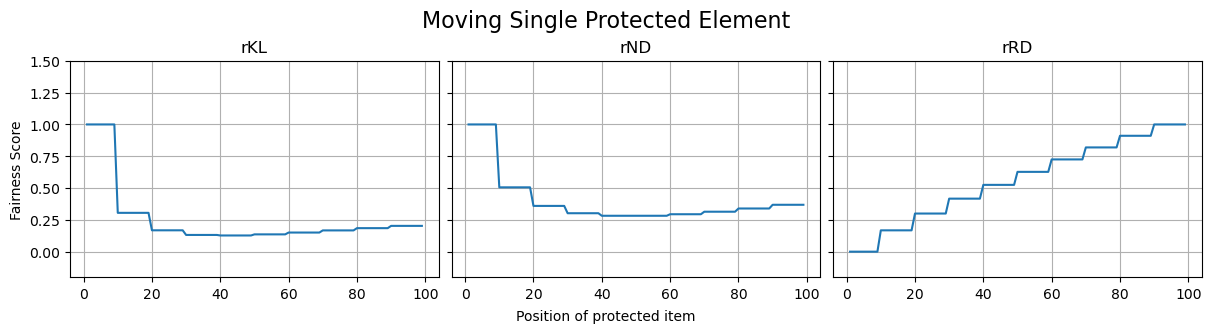

In [9]:
plotResults(results, 'Moving Single Protected Element', 'yang2017measuring_1.png', 'Position of protected item')

In [10]:
def fairness_of_rankings_with_protected_indeces(pro_index, cut_point = 10):
    N = len(pro_index)
    test_ranking = [x for x in range(N)]
    results = { KL_DIVERGENCE : [], 
           ND_DIFFERENCE : [],
           RD_DIFFERENCE : []}

    for i in range(1, N):   
        for j, metric in enumerate(metrics):
            Z = getNormalizer(N, i, metric)
            results[metric].append(calculateNDFairness(test_ranking, pro_index[:i], cut_point, metric, Z))
    
    return results

## Protected group ranks are added starting at the top of the ranking

That is similar to having fairness probability to be 1 in the paper

For rND, a ranking with top-50 being all protected class items is unfair, but adding more protected class members beyong 50 makes the ranking more fair. 

rRD makes intiuitivily more sense: a small group of protected class members at the top of the ranking makes it fair, but the more we add the less fair the ranking becomes

rKL jumps out of the [0,1] range when the proportion of the protected group is more than 0.5



In [11]:
pro_index = [x for x in range(N)]
results = fairness_of_rankings_with_protected_indeces(pro_index)

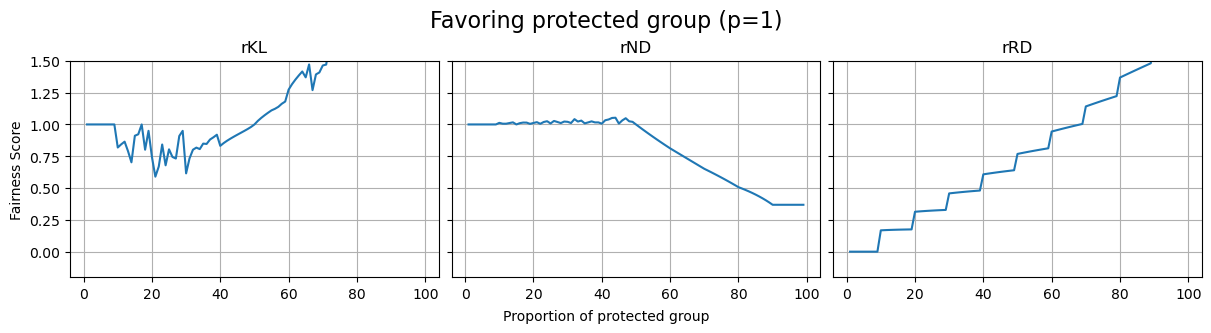

In [12]:
plotResults(results, 'Favoring protected group (p=1)', 'yang2017measuring_2.png', 'Proportion of protected group')

## Protected group ranks are added in to the bottom of the ranking and up

That is similar to having fainress probability to be 0 in the paper

The symmetry of rND is clearly visible here

rRD Thinks that the ranking is unfair all the time. which also makes sense since the protected class members have maximum disadvantage

In [13]:
pro_index = [x for x in range(N)[::-1]]
results = fairness_of_rankings_with_protected_indeces(pro_index)

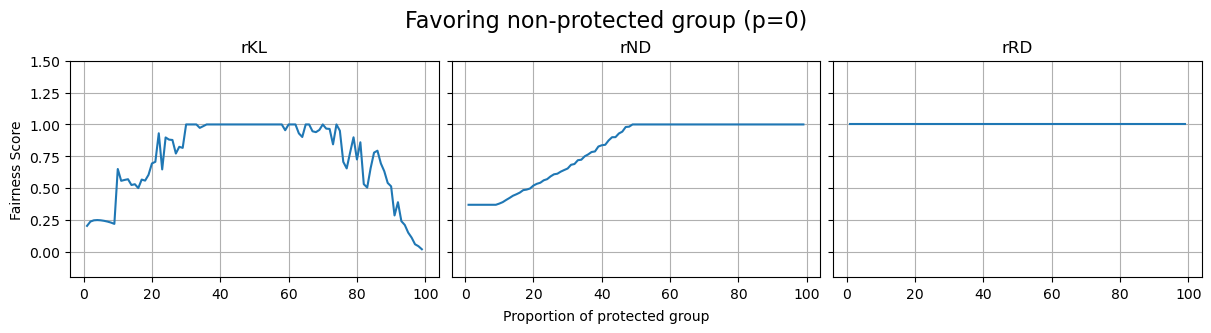

In [14]:
plotResults(results, 'Favoring non-protected group (p=0)', 'yang2017measuring_3.png', 'Proportion of protected group')

## Protected group ranks are added at random position each step

This is similar to a fairness probability of 0.5 in the paper

These seem to be positive results (it does not matter if 15 or 50 protected group members are in the ranking as long as they are positined randomly the ranking is generally fair)

They are all more sensitive in ranges 0-10 and 90-100

In [15]:
runs = 100

values = {}
for metric in metrics:
    values[metric] = np.zeros((runs, 99))
        
for i in tqdm(range(runs)):
    pro_index = random.sample(range(100), 100)
    results = fairness_of_rankings_with_protected_indeces(pro_index)
    
    for metric in metrics:
        values[metric][i] = results[metric]
        
final_results = {}

for metric in metrics:
    final_results[metric] = np.mean(values[metric], axis=0)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:08<00:00,  1.28s/it]


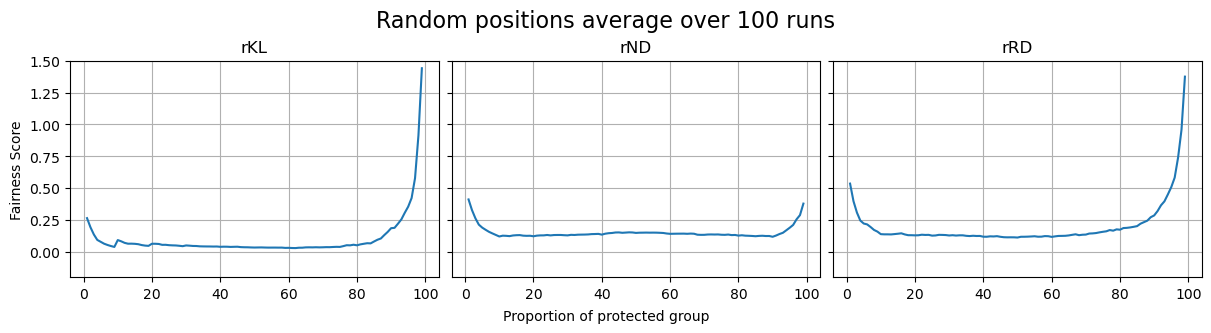

In [16]:
plotResults(final_results, f'Random positions average over {runs} runs', 'yang2017measuring_4.png', 'Proportion of protected group')

Since we noticed that local maxima in rKL around the cut points, we test how it behaves when the cut point is 1:

In [17]:
runs = 100

values = {}
for metric in metrics:
    values[metric] = np.zeros((runs, 99))
        
for i in tqdm(range(runs)):
    pro_index = random.sample(range(100), 100)
    results = fairness_of_rankings_with_protected_indeces(pro_index, cut_point = 1)
    
    for metric in metrics:
        values[metric][i] = results[metric]
        
resutls = {}

for metric in metrics:
    results[metric] = np.mean(values[metric], axis=0)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:13<00:00,  1.33s/it]


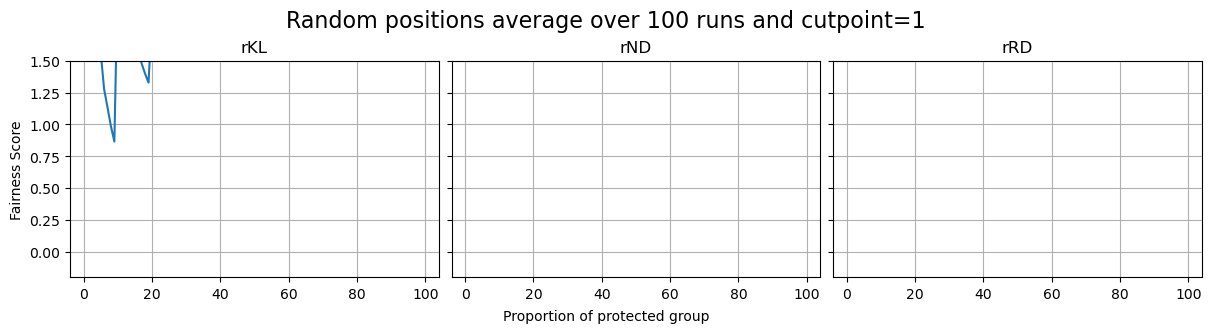

In [18]:
plotResults(results, f'Random positions average over {runs} runs and cutpoint=1', 'yang2017measuring_5.png', 'Proportion of protected group')

## Protected group ranks evenly distributed (even positions in increasing order then odd positions in decreasing order)

Increasing the proportion of the protected group maintaining a fairness probability of 0.5 

These Experiments simulate cases that result from the algorithm mentioned in the paper, where a fair ranking with fairness probability p=0.5 of a protected group of proportion p1 and a nonprotected group of proportion p2 = 1 - p1 then there is a prefix of length i in that ranking where the number of protected elements equals the number of the non portected elements and the remainder of that ranking is elements from the bigger group (group with more members). That is why for a total population of 100 and a p1 = 0.3, p2 =0.7 the first 60 positions in the ranking are divided equally between the two groups and the last 40 positions are members of the non protected group. All intermediate rankings created here will satisfy this property. The motivation behind it is to try and reveal corner cases that are harder to see for a random ranking with p=0.5



In [19]:
pro_index = [x for x in range(0, N, 2)] + [x for x in range(1, N, 2)][::-1]
results = fairness_of_rankings_with_protected_indeces(pro_index)

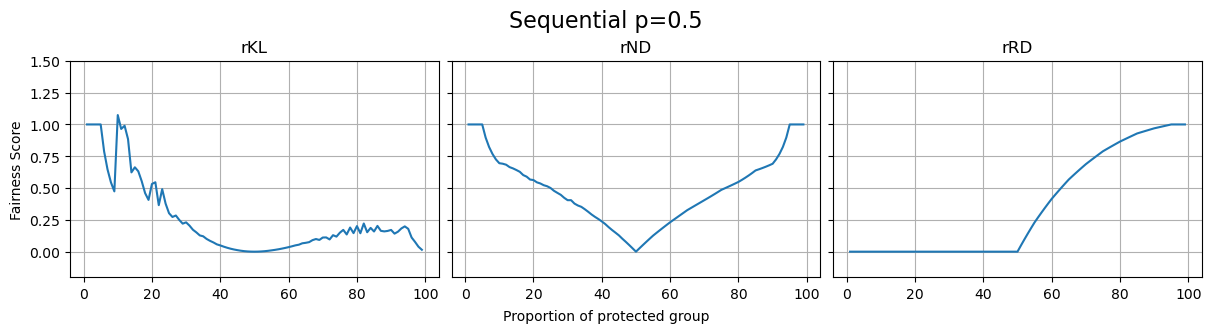

In [20]:
plotResults(results, 'Sequential p=0.5', 'yang2017measuring_6.png', 'Proportion of protected group')